# Introduction :

### - Being anonymous over the internet sometimes people take this as granted & say nasty things use inappropriate language that they normally would not in real life.Let's filter out the hate from our platforms one comment at a time.

# Objective:
### -To create an EDA/ feature-engineering starter notebook for toxic comment classification.

### import required packages

In [1]:
#import required packages
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import string

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords


### First read our dataset

In [4]:
#First read our dataset
df = pd.read_csv('train.csv')

In [5]:
print("First ten values of Dataset")
df.head(10)

First ten values of Dataset


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


### check there is any null value in our dataset

In [6]:
#check there is any null value in our dataset
print("Missing values in given dataset")
df.isnull().sum()

Missing values in given dataset


id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
# as we can see some comments not belongs to any category so we can say that one is clean comment 
# lets make one column and put those comments over there

In [8]:


# here using lamda function we create a new cloumn and put a tag if there is not any tag present in any 2:8 cloumn


In [9]:
df["non_toxic"] = df.iloc[:,2:8].apply(lambda x: 1 if (sum(x)==0) else 0, axis=1)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


###  Sum of all tags

In [10]:
df.iloc[:,2:].sum()

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
non_toxic        143346
dtype: int64

### Checking Corelation 

C:\Users\anike\AppData\Local\Temp\ipykernel_11496\3208205371.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
C:\Users\anike\AppData\Local\Temp\ipykernel_11496\3208205371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(sns.heatmap(df.corr()))


                  toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.308619  0.676515  0.157058  0.647518   
severe_toxic   0.308619      1.000000  0.403014  0.123601  0.375807   
obscene        0.676515      0.403014  1.000000  0.141179  0.741272   
threat         0.157058      0.123601  0.141179  1.000000  0.150022   
insult         0.647518      0.375807  0.741272  0.150022  1.000000   
identity_hate  0.266009      0.201600  0.286867  0.115128  0.337736   
non_toxic     -0.967748     -0.298666 -0.702812 -0.162925 -0.677324   

               identity_hate  non_toxic  
toxic               0.266009  -0.967748  
severe_toxic        0.201600  -0.298666  
obscene             0.286867  -0.702812  
threat              0.115128  -0.162925  
insult              0.337736  -0.677324  
identity_hate       1.000000  -0.280144  
non_toxic          -0.280144   1.000000  
AxesSubplot(0.125,0.11;0.62x0.77)


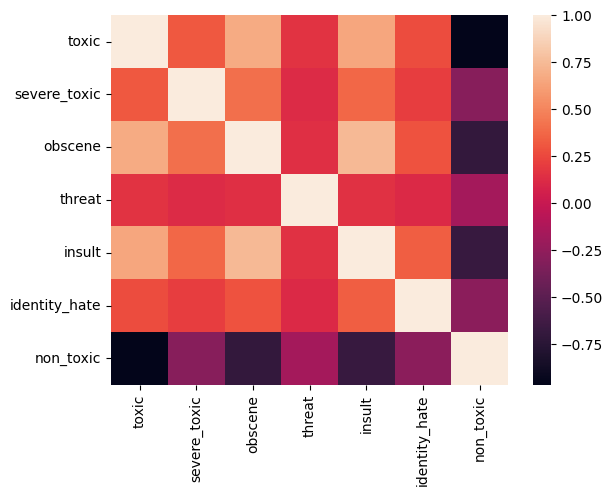

In [11]:
print(df.corr())
print(sns.heatmap(df.corr()))

### Impact of specific word for each tag using wordcloud

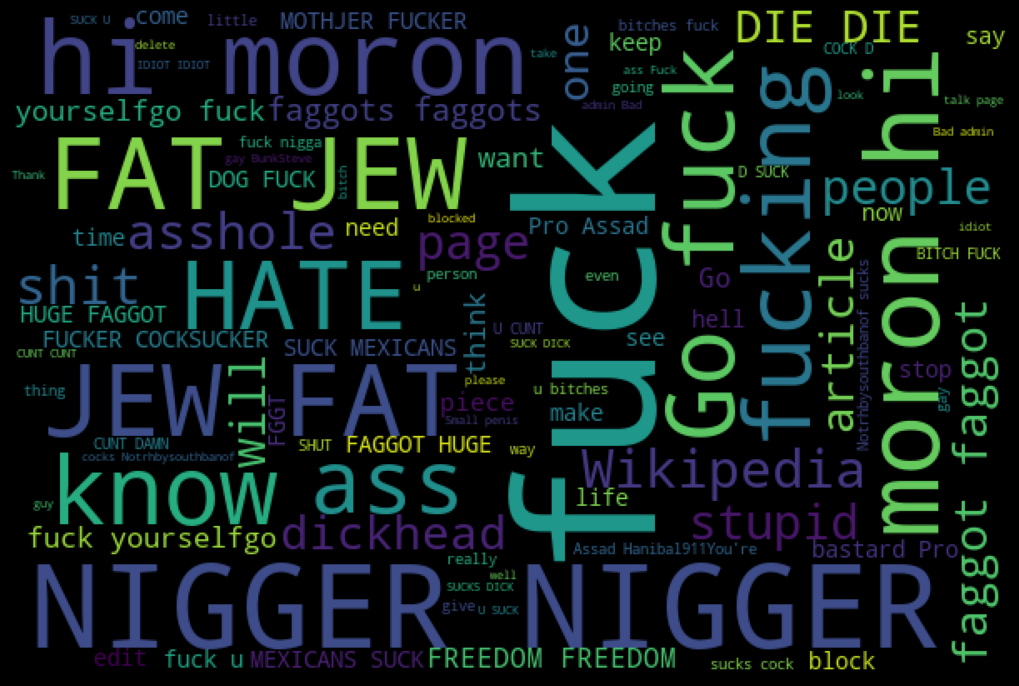

In [12]:
import re  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud

hams = df['comment_text'][df['insult']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=100).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


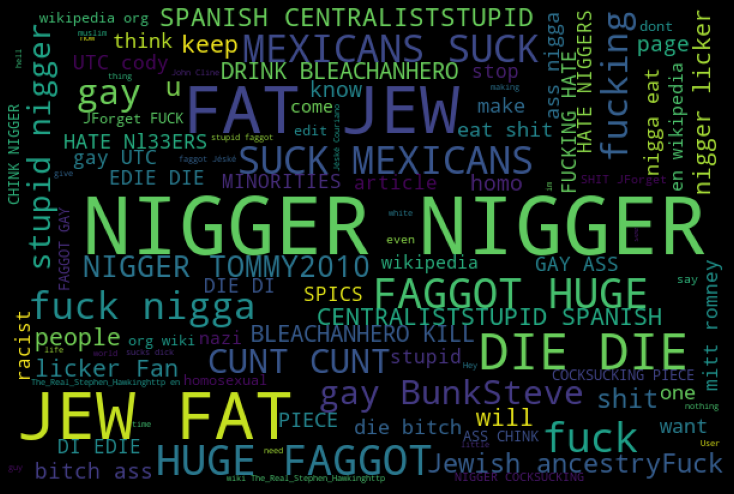

In [ ]:
hams = df['comment_text'][df['identity_hate']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=100).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

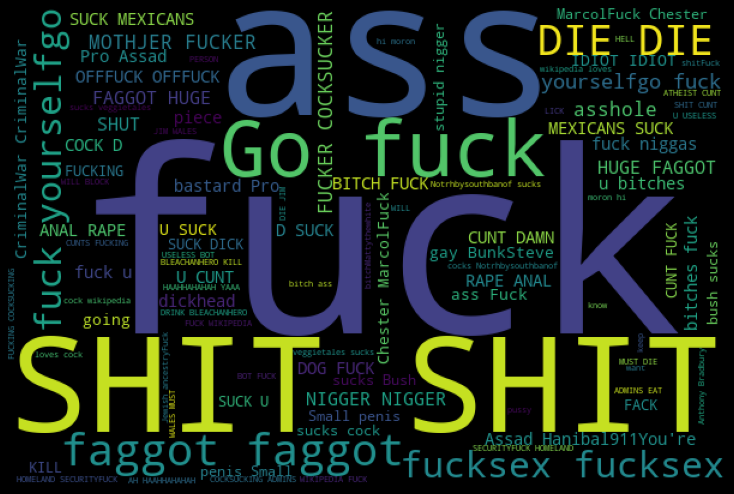

In [ ]:
hams = df['comment_text'][df['severe_toxic']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=100).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

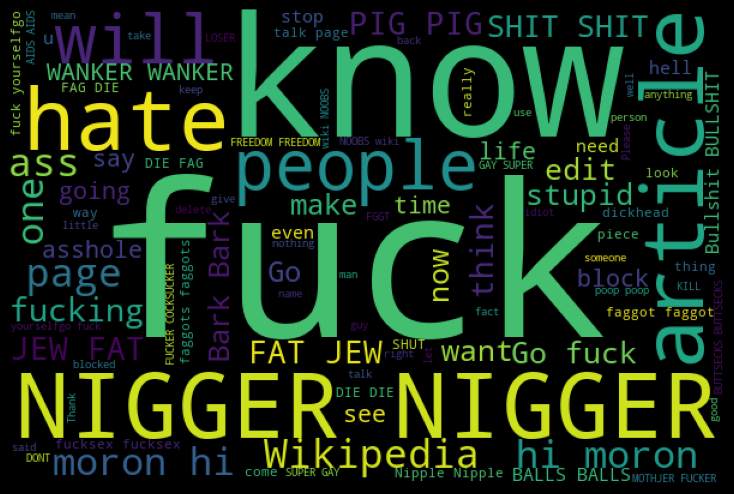

In [ ]:
hams = df['comment_text'][df['toxic']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=100).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

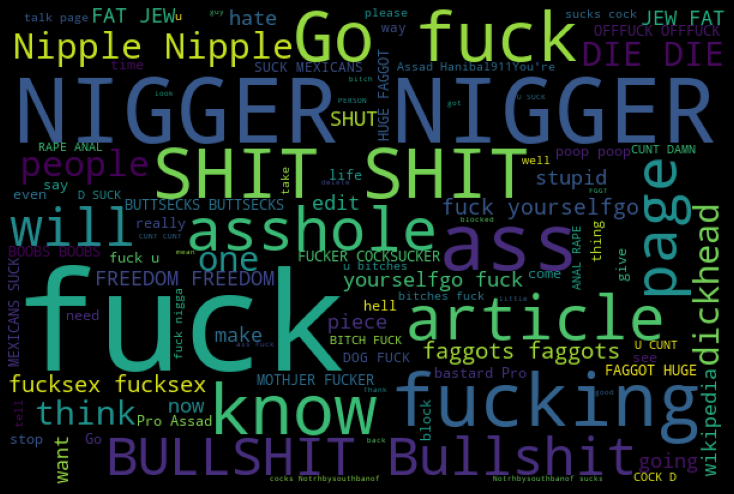

In [ ]:
hams = df['comment_text'][df['obscene']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=100).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

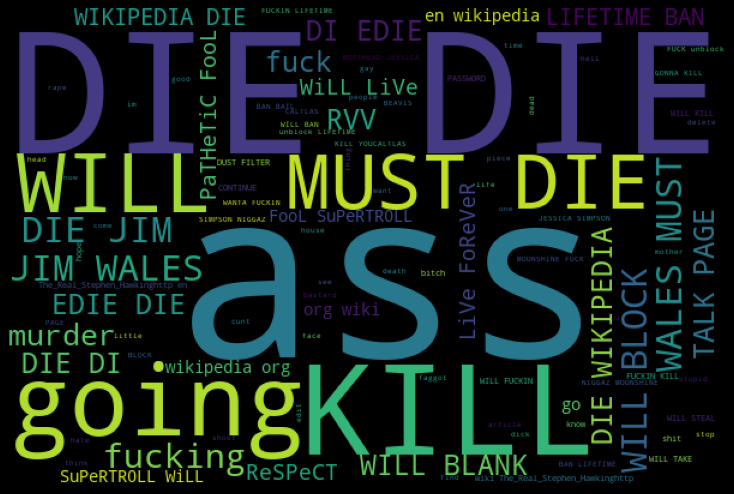

In [ ]:
hams = df['comment_text'][df['threat']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=100).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

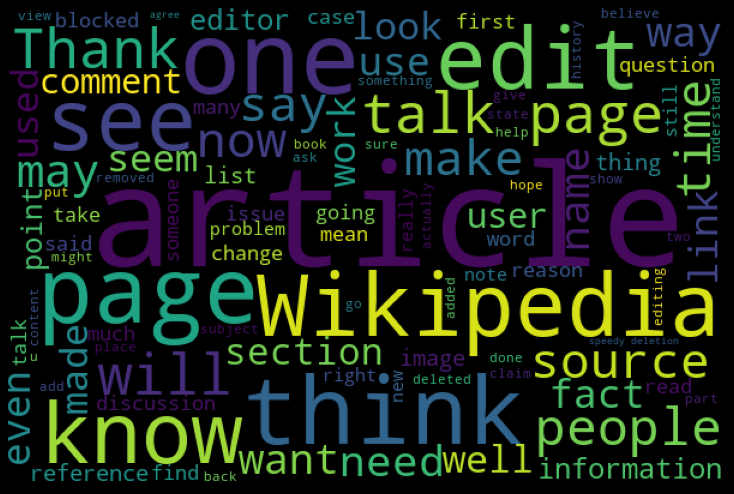

In [ ]:
hams = df['comment_text'][df['non_toxic']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=100).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

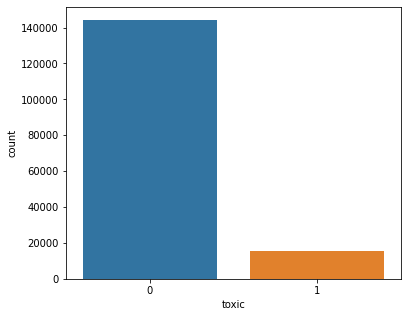

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize=(6,5))
#create count plot
ax = sns.countplot(x ='toxic', data = df)


Remove Punctuation

In [13]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['comment_text']= df['comment_text'].apply(lambda x:remove_punctuation(x))
df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0,1
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,\nMore\nI cant make any real suggestions on im...,0,0,0,0,0,0,1
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0,1


Converting into lowercase

In [14]:
df['comment_text']= df['comment_text'].apply(lambda x: x.lower())

Tokenization

In [15]:
#defining function for tokenization
#import re
#def tokenization(text):
    #tokens = re.split('W+',text)
    #return tokens
#applying function to the column
#df['clean_comment_text']= df['clean_comment_text'].apply(lambda x: tokenization(x))

In [ ]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0,1
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,\nmore\ni cant make any real suggestions on im...,0,0,0,0,0,0,1
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,1
5,00025465d4725e87,\n\ncongratulations from me as well use the to...,0,0,0,0,0,0,1
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0,0
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0,1
8,00037261f536c51d,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,1
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1


**Creating Count Vectors for sentiment_train Dataset**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=1500)
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit(df.comment_text)
# Get the feature names
features = feature_vector.get_feature_names()
print("Total number of features: ", len(features))

Total number of features:  1500


In [ ]:
import random
random.sample(features, 10)

['worth',
 'several',
 'raised',
 'but',
 'giving',
 'band',
 'reliable',
 'gone',
 'you',
 'barnstar']

In [ ]:
df_features = count_vectorizer.transform(df.comment_text)
type(df_features)

scipy.sparse.csr.csr_matrix

In [ ]:
df_features.shape

(159571, 1500)

In [ ]:
df_features.getnnz()

5125684

In [ ]:
print("Density of the matrix: ",df_features.getnnz() * 100 /(df_features.shape[0] * df_features.shape[1]))

Density of the matrix:  2.1414434118145946


In [ ]:
#The matrix has less than 1% non-zero values, that is, more than 99% values are zero values. This is a verysparse representation


Removing Low-frequency Words

In [ ]:
# Summing up the occurrences of features column wise
features_counts = np.sum(df_features.toarray(), axis = 0)
feature_counts_df = pd.DataFrame(dict(features = features,
counts = features_counts))

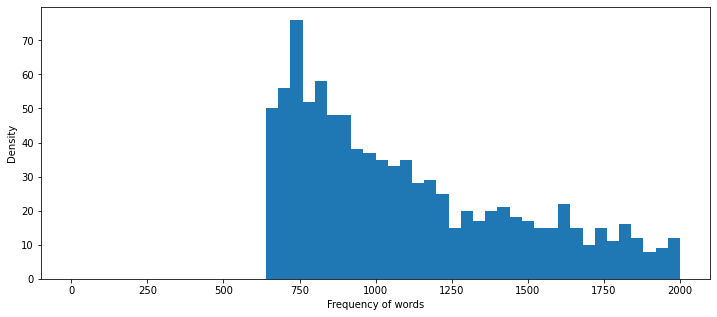

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(feature_counts_df.counts, bins=50, range = (0, 2000));
plt.xlabel('Frequency of words')
plt.ylabel('Density');

In [ ]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=1500)
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit(df.comment_text)
# Get the feature names
features = feature_vector.get_feature_names()
# Transform the document into vectors
df_features = count_vectorizer.transform(df.comment_text)
# Count the frequency of the features
features_counts = np.sum(df_features.toarray(), axis = 0)
feature_counts = pd.DataFrame(dict(features = features,
counts = features_counts))

In [ ]:
feature_counts.sort_values('counts',ascending = False)[0:15]

,features,counts
1296,the,495449
1328,to,296850
901,of,224016
97,and,222388
1491,you,204633
690,is,175963
1294,that,154396
658,in,144181
695,it,129900
528,for,102455


In [ ]:
'''It can be noticed that the selected list of features contains words like the, is, was, and, etc. These words
are irrelevant in determining the sentiment of the document. These words are called stop words and can
be removed from the dictionary. This will reduce the number of features further.'''

'It can be noticed that the selected list of features contains words like the, is, was, and, etc. These words\nare irrelevant in determining the sentiment of the document. These words are called stop words and can\nbe removed from the dictionary. This will reduce the number of features further.'

Removing Stop Words

In [ ]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
#Printing first few stop words
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['thus', 'former', 'nobody', 'now', 'sometime', 'another', 'third', 'as', 'two', 'where']


In [ ]:
# Adding custom words to the list of stop words
my_stop_words = text.ENGLISH_STOP_WORDS.union(['the','The','to','it','npov','anymore','years','ip','supporting','	improving','fixed','team''night','official'])

Creating Count Vectors

In [ ]:
# Setting stop words list
count_vectorizer = CountVectorizer(stop_words = my_stop_words,max_features = 1500)
feature_vector = count_vectorizer.fit(df.comment_text)
train_ds_features = count_vectorizer.transform(df.comment_text)
features = feature_vector.get_feature_names()
features_counts = np.sum(df_features.toarray(), axis = 0)
feature_counts = pd.DataFrame(dict(features = features,
counts = features_counts))

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['improving'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
feature_counts.sort_values('counts', ascending = False)[0:15]

,features,counts
1296,suppose,495449
1328,theories,296850
901,november,224016
97,apologize,222388
1491,year,204633
690,involvement,175963
1294,support,154396
658,improve,144181
695,islam,129900
528,fix,102455


Stemming and Lemmatization

In [ ]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
#Custom function for stemming and stop word removal
def stemmed_words(doc):

### Stemming of words
   stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
### Remove the words in stop words list
   non_stop_words = [word for word in stemmed_words if word not in my_stop_words]
   return non_stop_words

**Buliding Model**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df.comment_text)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
#toxic 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, df.toxic, test_size=0.2, random_state=42)
classifier1 = XGBClassifier()
classifier1.fit(X_train, y_train)

#test the calssification on the testing data
y_pred = classifier1.predict(X_test)

#Evalute the classifier perfomance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
classifier1.predict_proba(X[1])

[[28648   211]
 [ 1235  1821]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.60      0.72      3056

    accuracy                           0.95     31915
   macro avg       0.93      0.79      0.85     31915
weighted avg       0.95      0.95      0.95     31915



array([[0.99051356, 0.00948642]], dtype=float32)

In [19]:
#severe_toxic
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, df.severe_toxic, test_size=0.2, random_state=42)
classifier2 = XGBClassifier()
classifier2.fit(X_train, y_train)

#test the calssification on the testing data
y_pred = classifier2.predict(X_test)

#Evalute the classifier perfomance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
classifier2.predict_proba(X[1])

[[31519    75]
 [  255    66]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.47      0.21      0.29       321

    accuracy                           0.99     31915
   macro avg       0.73      0.60      0.64     31915
weighted avg       0.99      0.99      0.99     31915



array([[9.9944216e-01, 5.5782264e-04]], dtype=float32)

In [20]:
#obscene
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, df.obscene, test_size=0.2, random_state=42)
classifier3 = XGBClassifier()
classifier3.fit(X_train, y_train)

#test the calssification on the testing data
y_pred3 = classifier3.predict(X_test)

#Evalute the classifier perfomance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
classifier3.predict_proba(X[1])

[[30199     1]
 [ 1575   140]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     30200
           1       0.99      0.08      0.15      1715

    accuracy                           0.95     31915
   macro avg       0.97      0.54      0.56     31915
weighted avg       0.95      0.95      0.93     31915



array([[0.9970309 , 0.00296906]], dtype=float32)

In [21]:
#threat
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, df.threat, test_size=0.2, random_state=42)
classifier4 = XGBClassifier()
classifier4.fit(X_train, y_train)

#test the calssification on the testing data
y_pred = classifier4.predict(X_test)

#Evalute the classifier perfomance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
classifier4.predict_proba(X[1])

[[31826    15]
 [   59    15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31841
           1       0.50      0.20      0.29        74

    accuracy                           1.00     31915
   macro avg       0.75      0.60      0.64     31915
weighted avg       1.00      1.00      1.00     31915



array([[9.9986058e-01, 1.3940113e-04]], dtype=float32)

In [22]:
#insult
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, df.toxic, test_size=0.2, random_state=42)
classifier5 = XGBClassifier()
classifier5.fit(X_train, y_train)

#test the calssification on the testing data
y_pred = classifier5.predict(X_test)

#Evalute the classifier perfomance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
classifier5.predict_proba(X[1])

[[28648   211]
 [ 1235  1821]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.60      0.72      3056

    accuracy                           0.95     31915
   macro avg       0.93      0.79      0.85     31915
weighted avg       0.95      0.95      0.95     31915



array([[0.99051356, 0.00948642]], dtype=float32)

In [23]:
#identity_hate
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, df.toxic, test_size=0.2, random_state=42)
classifier6 = XGBClassifier()
classifier6.fit(X_train, y_train)

#test the calssification on the testing data
y_pred = classifier6.predict(X_test)

#Evalute the classifier perfomance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
classifier6.predict_proba(X[1])

[[28648   211]
 [ 1235  1821]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.60      0.72      3056

    accuracy                           0.95     31915
   macro avg       0.93      0.79      0.85     31915
weighted avg       0.95      0.95      0.95     31915



array([[0.99051356, 0.00948642]], dtype=float32)

In [24]:
#non_toxic
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, df.toxic, test_size=0.2, random_state=42)
classifier7 = XGBClassifier()
classifier7.fit(X_train, y_train)

#test the calssification on the testing data
y_pred = classifier7.predict(X_test)

#Evalute the classifier perfomance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
classifier7.predict_proba(X[1])

[[28648   211]
 [ 1235  1821]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.60      0.72      3056

    accuracy                           0.95     31915
   macro avg       0.93      0.79      0.85     31915
weighted avg       0.95      0.95      0.95     31915



array([[0.99051356, 0.00948642]], dtype=float32)

**Saving Models**

In [25]:
import pickle
file = open('classifier1.pkl','wb')
pickle.dump(classifier1,file)

In [28]:
file = open('classifier2.pkl','wb')
pickle.dump(classifier2,file)


In [29]:
file = open('classifier3.pkl','wb')
pickle.dump(classifier3,file)


In [30]:
file = open('classifier4.pkl','wb')
pickle.dump(classifier4,file)


In [31]:
file = open('classifier5.pkl','wb')
pickle.dump(classifier5,file)


In [32]:
file = open('classifier6.pkl','wb')
pickle.dump(classifier6,file)


In [33]:
file = open('classifier7.pkl','wb')
pickle.dump(classifier7,file)


In [34]:
file = open('vectorizer.pkl','wb')
pickle.dump(vectorizer,file)


In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Converting all text into lower case

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Removing Punctuation

In [ ]:
df['comment_text'] = df['comment_text'].str.replace('[^\w\s]','' )

<ipython-input-19-b5a567fb27a1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace('[^\w\s]','' )


### Remvoing Stop Words

In [ ]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
print("few stop words:", list(stop_words)[:10])

few stop words: ['hence', 'since', 'her', 'without', 'can', 'its', 'but', 'while', 'or', 'became']


In [ ]:
from nltk.tokenize import wordpunct_tokenize
stopwords_list = stopwords.words("english")
def removals(text):
    tokens = wordpunct_tokenize(text)
    output = []
    for word in tokens:
        if word not in stopwords_list:
            output.append(text)
   
    return " ".join(output)

df['comment_text'] = df['comment_text'].apply(lambda x: removals(x))

In [ ]:
df.shape

(159571, 9)

In [ ]:
from google.colab import files
import pickle
file = open('df','wb')
pickle.dump(df,file)
files.download('df')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df2 = pd.read_pickle('df')